In [1]:
# -*- coding: utf-8 -*-
from keras.datasets import mnist                #从keras.datasets中导入mnist.py文件
from keras.utils import to_categorical          #从keras.utils库中导入to_categorical方法
#to_categorical就是将类别向量转换为二进制（只有0和1）的矩阵类型表示。其表现为将原有的类别向量转换为独热编码的形式
import numpy as np                              #导入numpy
from keras import utils as np_utils
#from numpy.utils import to_categorical

  # force a channel ordering
from keras import backend
  # force channels-first ordering
#backend.set_image_data_format('channels_first')
print(backend.image_data_format())

Using TensorFlow backend.
/usr/local/python3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/python3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/python3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/python3/lib/python3.7/site-packages/tensorflow/python/fra

channels_last


In [2]:
#导入mnist数据集====================================================================================================
#train_X, train_y = mnist.load_data()[0]
path='./mnist.npz'                              #利用numpy读入mnist数据集
f = np.load(path)
train_X, train_y = f['x_train'], f['y_train']   #获取训练集的特征矩阵赋值给变量train_X，获取训练集的标签赋值给变量train_y；
test_X, test_y = f['x_test'], f['y_test']       #获取测试集的数据的特征赋值test_X，标签赋值给变量test_y；
f.close()
print(train_X.shape, train_y.shape)            #输出训练集的维度 (60000, 28, 28) (60000,)
print(test_X.shape, test_y.shape) 

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
#训练数据预处理=================================================================================================================
train_X = train_X.reshape( -1,28, 28,1)       #reshape成网络需要的数据格式
print("train_X的维度：",train_X.shape)
train_X = train_X.astype('float32')            #训练数据的数据类型设为float32
print("train_X的数据类型：",train_X.dtype)
train_X /= 255                                 #归一化，标准化
train_y = to_categorical(train_y, 10)   
print("train_X的维度：",train_y.shape)

#未转化第一个数是 5
#print(train_y[:1])
train_yOneHot = np_utils.to_categorical(train_y)
#转化  One-Hot Encoding 都是以0 1 表示，5 在第六个位置
#print(train_yOneHot[:1])

train_X的维度： (60000, 28, 28, 1)
train_X的数据类型： float32
train_X的维度： (60000, 10)


In [4]:
#网络构建========================================================================================================
from keras.models import Sequential                                     #导入keras中的模型方法
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense     #导入keras中的层函数：卷积、池化、铺平、dropout、全连接
from keras.losses import categorical_crossentropy                       #导入keras中损失函数
from keras.optimizers import Adadelta                                   #导入keras中的优化器
#模型训练并保存========================================================================================================
model = Sequential()                                                    #用keras.model库的Sequential方法实例化模型对象；
model.add(Conv2D(16, (3,3), activation='relu', padding='same',input_shape=[28, 28,1]))     #c1
model.add(MaxPool2D(pool_size=(2,2)))                                                      #s2
model.add(Conv2D(32, (3,3), activation='relu',padding='same'))                             #c3
model.add(MaxPool2D(pool_size=(2,2)))                                                      #s4
model.add(Flatten())                                                                       #Flatten5
model.add(Dropout(0.5))                                                                    #dropout6
model.add(Dense(128, activation='relu'))                                                   #fc7
model.add(Dropout(0.5))                                                                    #dropout8
model.add(Dense(10, activation='softmax'))                                                 #fc9
print("模型梗概：",model.summary())   #查看模型摘要
#model,save('my5ceng.h5')
model.get_layer(index=0)      #依据层名或下标获得层对象

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1568)              0         
________________________________________________

In [5]:
#开始训练模型================================================================================================
#x 是训练数据集， y 是训练数据集的标签， validation_split 是把训练数据集分为 8 份训练数据集 2 份验证集
#epochs 是迭代次数 20， batch_size 是批量 256， verbose 为 2 显示训练过程
model.compile(loss=categorical_crossentropy,    #指定模型的损失函数、优化器、评判指标（AP）
             optimizer=Adadelta(),
             metrics=['accuracy'])

batch_size = 100                         #每次模型训练使用100个样本数量
epochs = 10                              #所有样本遍历10次
from numpy import *
from keras.callbacks import EarlyStopping   #早挺
callbacks=[EarlyStopping(monitor='val_accuracy', min_delta=0,
                              patience=0, verbose=0, mode='auto',
                              baseline=None, restore_best_weights=False)]
train_history=model.fit(train_X, train_y,                  #训练特征矩阵、训练标签、batch_size大小、epochs大小、验证集比例
         batch_size=batch_size,validation_split = 0.2,
         epochs=epochs,callbacks=callbacks)
#keras的模型一般保存为后缀名为h5的文件，比如final_model.h5。同样是h5文件用save()和save_weight()保存效果是不一样的。
#
model.save("model1.h5") 

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 18s 378us/step - loss: 0.4127 - accuracy: 0.8670 - val_loss: 0.0907 - val_accuracy: 0.9742
Epoch 2/10
48000/48000 [==============================] - 18s 374us/step - loss: 0.1575 - accuracy: 0.9514 - val_loss: 0.0669 - val_accuracy: 0.9797
Epoch 3/10
48000/48000 [==============================] - 18s 374us/step - loss: 0.1276 - accuracy: 0.9612 - val_loss: 0.0577 - val_accuracy: 0.9827
Epoch 4/10
48000/48000 [==============================] - 18s 376us/step - loss: 0.1111 - accuracy: 0.9665 - val_loss: 0.0497 - val_accuracy: 0.9847
Epoch 5/10
48000/48000 [==============================] - 18s 373us/step - loss: 0.1017 - accuracy: 0.9689 - val_loss: 0.0475 - val_accuracy: 0.9852
Epoch 6/10
48000/48000 [==============================] - 18s 375us/step - loss: 0.0909 - accuracy: 0.9731 - val_loss: 0.0447 - val_accuracy: 0.9857
Epoch 7/

In [6]:
#模型测试========================================================================================================
#测试数据集预处理
test_X = test_X.reshape(-1, 28, 28, 1)    #将原始的特征矩阵做数据处理形成模型需要的数据
test_X = test_X.astype('float32')
test_X /= 255
test_y = to_categorical(test_y, 10)       #使用keras中的to_categorical方法对数字的标签分类做One-Hot编码
loss, accuracy = model.evaluate(test_X, test_y, verbose=1)    #使用测试集的数据做模型评估，打印损失函数值和准确率
print('loss:%.4f accuracy:%.4f' %(loss, accuracy))  

10000/10000 [==============================] - 1s 134us/step
loss:0.0330 accuracy:0.9891


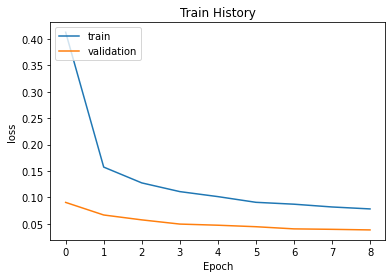

In [7]:
#画出训练损失和正确率曲线图=============================================================================================
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.show()
show_train_history(train_history, 'loss', 'val_loss')

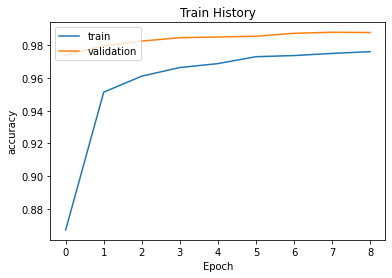

In [8]:
show_train_history(train_history, 'accuracy', 'val_accuracy')